## Surface spatial distribution

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature

In [2]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'

In [3]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [4]:
# mort_cmap = copy(plt.get_cmap('RdPu'))
mort_cmap = ['#FF7917','#14FF37', '#732FFF']
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue']
r_pl_clist = ['#7a0177', '#c51b8a', '#f768a1', '#fbb4b9','#feebe2']
r_pl_cmap = plt.get_cmap('RdPu_r')

In [5]:
region = ['EqPac','NPSG', 'SO']
mortality = 0.39              # [d-1]
runtime = 20                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = 'no'
sizebinedges = [1e-3, 0.5e-3, 1e-4, 1e-5, 1e-6]

In [6]:
ds_0 = xr.open_dataset(datadir+'regional_'+region[0]+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region[1]+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_2 = xr.open_dataset(datadir+'regional_'+region[2]+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [7]:
dslist = [ds_0, ds_1, ds_2]

In [8]:
number_of_trajectories_to_plot = 225
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 225 of 10000 trajectories
plotting every 44 particles


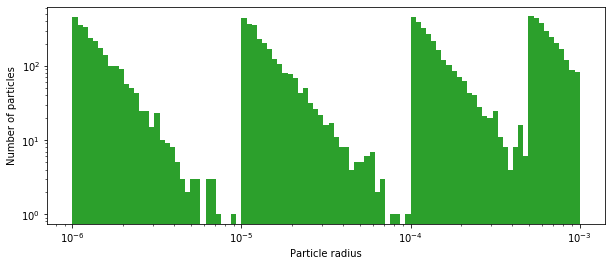

In [9]:
fig = plt.figure(figsize=(10,4)),
ax=plt.axes()
for ds in dslist:
    ax.hist(ds['r_pl'],np.logspace(np.log10(ds['r_pl'].min()).round(),np.log10(ds['r_pl'].max()).round(),100))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Number of particles')
ax.set_xlabel('Particle radius')
plt.show()

In [10]:
split_ds_0 = list(ds_0.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_ds_1 = list(ds_1.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_ds_2 = list(ds_2.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_dslist = [split_ds_0, split_ds_1]

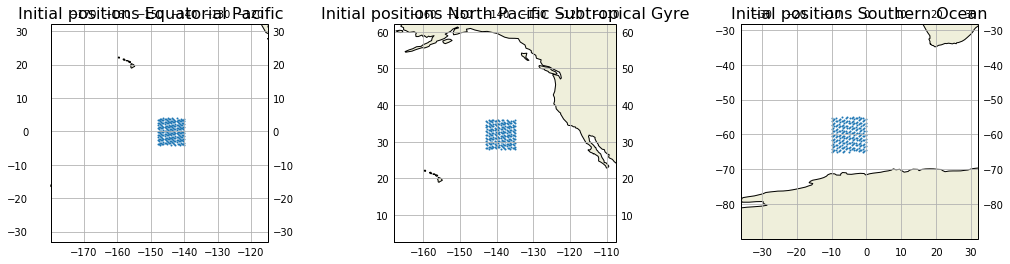

In [11]:
fig = plt.figure(figsize=(18,4))

gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0],projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1],projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[0, 2],projection=ccrs.PlateCarree())
axes = [ax1, ax2, ax3]

for i, ax in enumerate(axes):
    ax.set_title('Initial positions '+ regions[region[i]], fontsize=16)
    ax.scatter(dslist[i]['lon'][::f_plt,0],dslist[i]['lat'][::f_plt,0],s=1)
    ax.coastlines()
    ax.add_feature(cfeature.LAND)
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    ax.set_ylim(np.min(dslist[i]['lat'])-25,np.max(dslist[i]['lat'])+25)
    ax.set_xlim(np.min(dslist[i]['lon'])-25,np.max(dslist[i]['lon'])+25)
# plt.show()

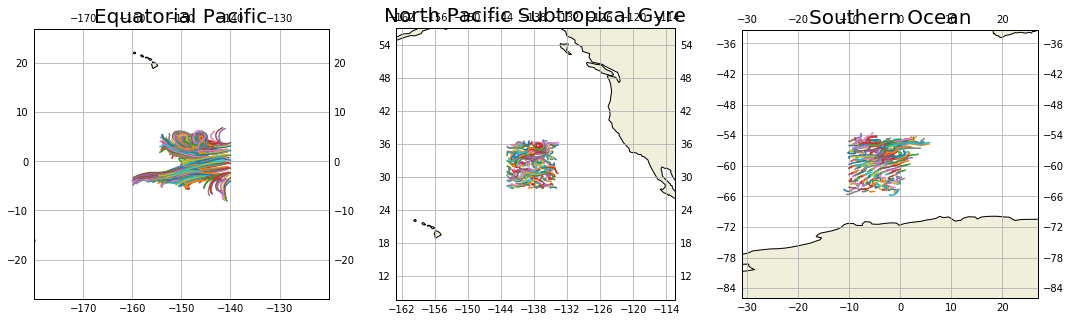

In [12]:
fig = plt.figure(figsize=(18,5))
gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0],projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1],projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[0, 2],projection=ccrs.PlateCarree())
axes = [ax1, ax2, ax3]

for i, ax in enumerate(axes):
    ax.set_title(regions[region[i]], fontsize=20)

    ax.plot(dslist[i]['lon'].T[:,::f_plt],dslist[i]['lat'].T[:,::f_plt])
    ax.coastlines()
    ax.add_feature(cfeature.LAND)
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    ax.set_ylim(np.min(dslist[i]['lat'])-20,np.max(dslist[i]['lat'])+20)
    ax.set_xlim(np.min(dslist[i]['lon'])-20,np.max(dslist[i]['lon'])+20)
plt.show()

/usr/local/lib64/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


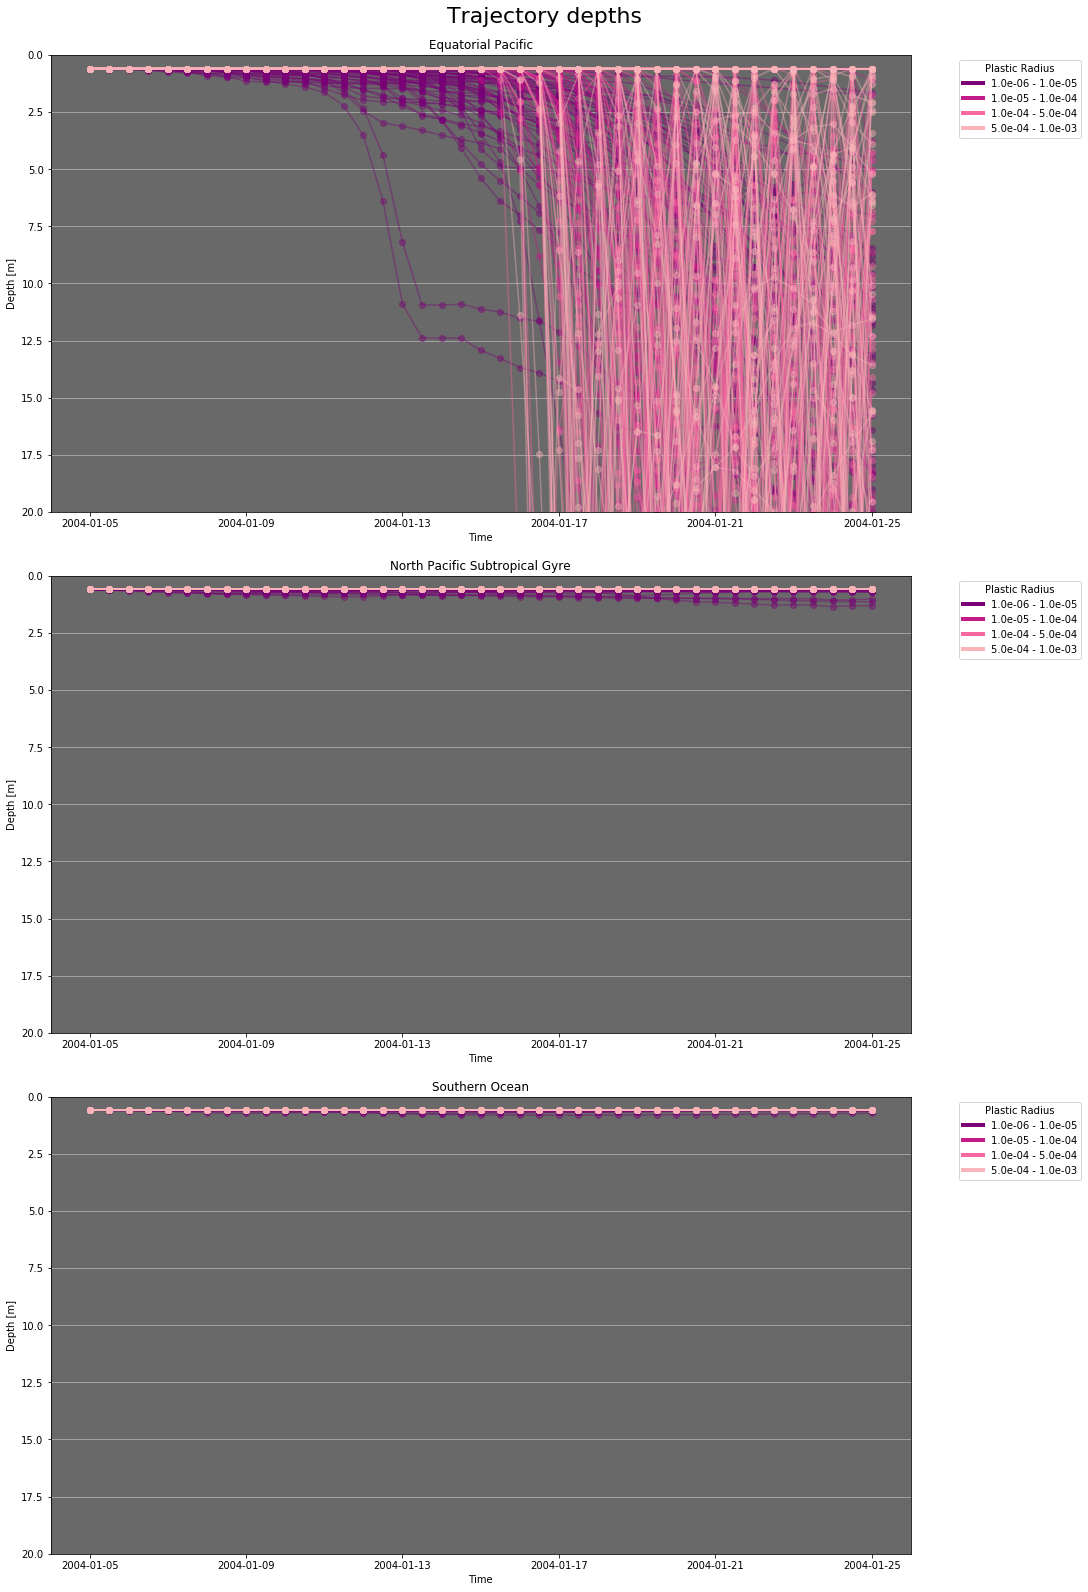

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,22), constrained_layout=True)
fig.suptitle('Trajectory depths', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)
    
ax1.set_title(regions[region[0]])
ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Time')
ax1.set_facecolor('dimgray')
ax1.set_ylim(20,0)
ax1.grid(b=True, axis='y')

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),
                Line2D([0], [0], color=r_pl_clist[2], lw=4),
                Line2D([0], [0], color=r_pl_clist[3], lw=4)]

ax1.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')


for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)    

ax2.set_title(regions[region[1]])
ax2.set_ylabel('Depth [m]')
ax2.set_xlabel('Time')
ax2.set_facecolor('dimgray')
ax2.set_ylim(20,0)
ax2.grid(b=True, axis='y')

ax2.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)    

ax3.set_title(regions[region[2]])
ax3.set_ylabel('Depth [m]')
ax3.set_xlabel('Time')
ax3.set_facecolor('dimgray')
ax3.set_ylim(20,0)
ax3.grid(b=True, axis='y')

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[2][0].left, right=split_ds_1[2][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[3][0].left, right=split_ds_1[3][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()